In [1]:
from read_data import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
df = read_csv('../../input/block_data.csv')

CPU times: user 3min 14s, sys: 12.8 s, total: 3min 26s
Wall time: 3min 22s


In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260068750 entries, 0 to 260068749
Data columns (total 5 columns):
Level            int8
ClientMacAddr    int64
latBlock         int8
lngBlock         int8
localtime        datetime64[ns]
dtypes: datetime64[ns](1), int64(1), int8(3)
memory usage: 4.6 GB


In [11]:
df['month'] = df.localtime.dt.month
df['day'] = df.localtime.dt.day
df['hour'] = df.localtime.dt.hour
df['quarter'] = df.localtime.dt.minute//15

In [54]:
group = test.groupby(by=['Level','latBlock','lngBlock','month','day','hour','quarter']).size().reset_index(name='count')
#group.columns = ['count']
#group.reset_index(drop=False,inplace=True)

In [45]:
test=df.head(10**6)[['Level','latBlock','lngBlock','month','day','hour','quarter']]

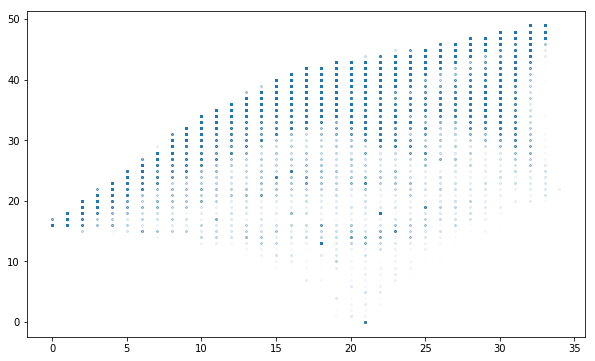

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(test.loc[test.Level==5,'lngBlock'], test.loc[test.Level==5,'latBlock'],alpha=0.01,s=5)
plt.show()

In [3]:
%%time
df = pd.read_csv('../../input/Merged_Input.csv',usecols=['Level','lng','lat'],dtype={'lng':'float64','lat':'float64'})

CPU times: user 1min 32s, sys: 7.44 s, total: 1min 40s
Wall time: 1min 37s


In [11]:
df.Level.unique()

array(['Level5', 'Level 1', 'Level B1'], dtype=object)

In [19]:
mask=(df.Level=='Level B1')

In [25]:
for f in ['lng','lat']:
    print(df[f].max())
    print(df[f].min())

103.85218281
103.850815
1.29113894
1.28961633


In [22]:
for f in ['transformedLng','transformedLat']:
    print(df.loc[mask,f].min())
    print(df.loc[mask,f].max())

0.0
0.0007586800000041194
-0.0004127313021250311
0.0004330021423923565


In [23]:
df.loc[mask].lng.nunique()

2200158